# Keras 기초

## MNIST

In [59]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

### 1. 데이터셋 생성

훈련, 검증 시험셋 생성

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [61]:
x_train.shape # (60000, 28, 28) 6만개의 28 x 28 픽셀 이미지

(60000, 28, 28)

데이터 형식 변환

In [62]:
# 0 ~ 1 사이로 scaling
x_train = x_train.reshape(60000, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(10000, 28 * 28).astype("float32") / 255.0

In [63]:
# One-Hot Encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### 2. 모델(신경망, 딥러닝) 구성

Sequential 클래스를 이용하여 레이어를 추가하여 구성

In [64]:
model = Sequential()
model.add(Dense(units=64, input_dim=28 * 28, activation="relu")) # add함수: layer 추가
model.add(Dense(units=10, activation="softmax"))

### 3. 학습과정 설정

compile 함수를 이용하여 cost 함수 및 최적화 방법 정의

In [65]:
# cost 함수, 최적화 방법, 평가 지표 정의
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

### 4. 모델 학습

fit 함수를 이용하여 훈련 -> 모델 학습

In [66]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 1s 599us/step - loss: 0.6695 - accuracy: 0.8288
Epoch 2/5
1875/1875 [==============================] - 1s 586us/step - loss: 0.3503 - accuracy: 0.9018
Epoch 3/5
1875/1875 [==============================] - 1s 614us/step - loss: 0.3053 - accuracy: 0.9140
Epoch 4/5
1875/1875 [==============================] - 1s 588us/step - loss: 0.2777 - accuracy: 0.9221
Epoch 5/5
1875/1875 [==============================] - 1s 654us/step - loss: 0.2566 - accuracy: 0.9278


### 5. 학습과정 점검

훈련/검증 데이터셋 cost, accuracy 확인

In [67]:
print(hist.history['loss'])

[0.669458270072937, 0.35029110312461853, 0.3053295612335205, 0.27774521708488464, 0.25656527280807495]


In [68]:
print(hist.history['accuracy'])

[0.8287833333015442, 0.9017500281333923, 0.9139833450317383, 0.9221000075340271, 0.9277833104133606]


### 6. 모델 평가

evaluate 함수를 이용하여 모델을 평가

In [69]:
res = model.evaluate(x_test, y_test, batch_size=32)
print("모델 평가 결과: ", res)

313/313 [==============================] - 0s 477us/step - loss: 0.2401 - accuracy: 0.9328
모델 평가 결과:  [0.24010217189788818, 0.9327999949455261]


### 7. 모델 사용

predict 함수를 이용하여 모델의 예측값 출력

In [70]:
y_hat = model.predict(x_test[0:1])
print("예측 결과: ", *y_hat) # softmax 함수의 결과값 0 ~ 9까지의 숫자마다의 확률
print("숫자: ", np.argmax(y_hat)) 

예측 결과:  [1.8557158e-04 2.8138982e-07 3.8110840e-04 8.5249729e-03 2.4888504e-06
 7.4367410e-05 9.1639841e-08 9.8968786e-01 7.5680793e-05 1.0676443e-03]
숫자:  7


## 선형 회귀(Linear Regression)
* 학습량에 따른 시험점수 예측하기
    * $\text{exam_score} = w * \text{study_hours} + b$

In [112]:
x = np.arange(1, 11) # 공부 시간
y = np.array([10, 20, 33, 42, 35, 50, 70, 80, 88, 100]) # 점수

In [113]:
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation="linear")) # add함수: layer 추가

In [114]:
from keras import optimizers

optimizers.SGD(lr=0.01) # lr = learning rate(alpha)
model.compile(loss="mse", optimizer="sgd", metrics=['mse'])

hist = model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 3498.7390 - mse: 3498.7390
Epoch 2/100
1/1 [==============================] - 0s 821us/step - loss: 189.5833 - mse: 189.5833
Epoch 3/100
1/1 [==============================] - 0s 820us/step - loss: 37.7435 - mse: 37.7435
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 30.7660 - mse: 30.7660
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 30.4351 - mse: 30.4351
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 30.4093 - mse: 30.4093
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 30.3976 - mse: 30.3976
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 30.3866 - mse: 30.3866
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 30.3757 - mse: 30.3757
Epoch 10/100
1/1 [==============================] - 0s 820us/step - loss: 30.3649 - mse: 30.3649
Epoch 11/100
1/1 [==============================

In [115]:
res = model.evaluate(x, y)
print("모델 평가 결과: ", res)

1/1 [==============================] - 0s 2ms/step - loss: 29.6812 - mse: 29.6812
모델 평가 결과:  [29.681224822998047, 29.681224822998047]


In [117]:
print("예측 결과: ", model.predict([9.5]))

예측 결과:  [[91.465775]]


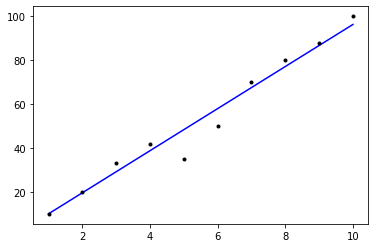

In [119]:
import matplotlib.pyplot as plt

plt.plot(x, model.predict(x), 'b', x, y, 'k. ')

## 로지스틱 회귀(Logistics Regression)

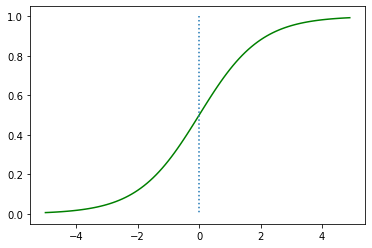

In [167]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'g')
plt.plot([0, 0], [1, 0], ':')

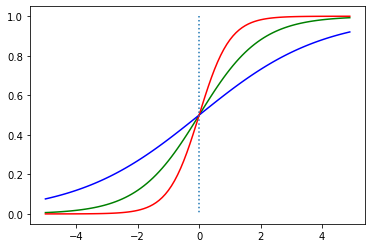

In [173]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(1 * x)
y2 = sigmoid(0.5 * x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'g')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'r')
plt.plot([0, 0], [1, 0], ':')

## 이진 분류

In [174]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation="sigmoid"))

In [175]:
sgd = optimizers.SGD(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['binary_accuracy'])

In [ ]:
model.fit(x, y, batch_size=1, epochs=300)

In [ ]:
plt.plot(x, model.predict(x), 'b', x', y', 'k. ')
model.predict([1, 3, 4])